In [13]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows',500)

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


In [14]:
mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

In [15]:
sns.set(style="darkgrid")

![CRISP_DM](Crisp_DM_Tasks.png)

# Explorative Data Analysis

* focus is often on the visual representation of the data

In [16]:
df_plot=pd.read_csv('C:/ProgramData/Anaconda3/eps_covid19/data/processed/COVID_small_flat_table.csv',sep=';')
df_plot.head()

,date,Albania,India,Italy,Germany,US
0,2020-01-22,0,0,0,0,1
1,2020-01-23,0,0,0,0,1
2,2020-01-24,0,0,0,0,2
3,2020-01-25,0,0,0,0,2
4,2020-01-26,0,0,0,0,5


# Matplotlib Example

<Figure size 1152x648 with 0 Axes>

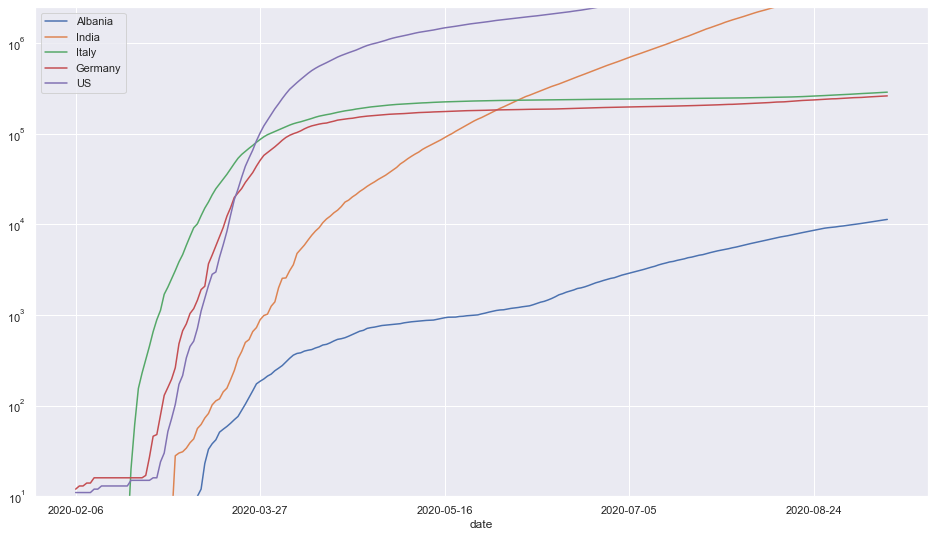

In [17]:
plt.figure();
ax=df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 2500000)
ax.set_yscale('log')

# Plot.ly

In [18]:
import plotly.graph_objs as go

In [19]:
import plotly
plotly.__version__

'4.8.2'

In [20]:
country_list=['Italy',
              'US',
              'India',
              'Germany',
              'Albania',
             ]

In [21]:
##defines hoe to plot the individual trace
fig = go.Figure()
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                            y=df_plot[each],
                            mode='markers+lines',
                            opacity=0.9,
                            line_width=2,
                            marker_size=4,
                            name=each
                            )
                 )

## defines the overall layout properties
fig.update_layout(
    width=1280, #1280 or 1920
    height=720, #720 or 1080
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source Johns Hopkins csse, log-scale)",
)
fig.update_yaxes(type="log", range=[1.1,7.5])

fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome') if doing in chrome
fig.show()
fig.show(renderer='browser')
#fig.show()


In [22]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'India', 'value': 'India'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Albania', 'value': 'Albania'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Italy', 'value': 'Italy'}
        ],
        value=['US', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [23]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down','value')])
def update_figure(country_list):
    
    traces=[]
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                          y=df_plot[each],
                          mode='markers+lines',
                          opacity=0.9,
                          line_width=2,
                          marker_size=4,
                          name=each
                          )
                     )
    return{
        'data' : traces,
        'layout' : dict(
            width=1280, #1280 or 1920
            height=720, #720 or 1080
            xaxis_title="Time",
            yaxis_title="Confirmed infected people (source Johns Hopkins csse, log-scale)",
            xaxis={'tickangle':-45,
                  'nticks':20,
                  'tickfont':dict(size=14,color="#7f7f7f"),
                  },
            yaxis={'type' : "log",
                  'range':'[1.1,8.5]'
                  }
        )
    }

In [24]:
# take care to press stop button before calling once agian, since address will be blocked (server up)
app.run_server(debug=True, use_reloader=False) #Turn off reloader if inside Jupyter

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 257-377-623
Debugger PIN: 257-377-623
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
